# Trabajo final de modulo Jukumari Veterinary Automated Software (JVAS) con colaboracion EasyVet.
El presente trabajo conforma un analisis de datos y entrenamiento de modelos predictivos para mejorar y ayudas en la atencion rapida de los pacientes en las veterinarias de Latinoamerica.

In [2]:
# importacion de librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

In [3]:
# cargado de datos
df = pd.read_csv('./diseases_and_treatments_cats.csv', index_col=0)
df.head()

,ID_Gato,Raza,Edad,Enfermedad,Tratamiento,Resultado
0,1,Ragdoll,12,Infección urinaria,Medicación tiroidea,Mejora
1,2,Persa,11,Diabetes,Antibióticos,Mejora
2,3,Persa,14,Enfermedad renal,Terapia de fluidos,Sin Cambio
3,4,Ragdoll,1,Alergias,Medicación tiroidea,Mejora
4,5,Persa,1,Enfermedad renal,Insulina,Sin Cambio


In [4]:
# Estadísticas generales
print(df.describe(include='all'))

# Frecuencias de enfermedades, tratamientos y resultados
print(df['Enfermedad'].value_counts())
print(df['Tratamiento'].value_counts())
print(df['Resultado'].value_counts())

            ID_Gato    Raza         Edad Enfermedad   Tratamiento Resultado
count   1000.000000    1000  1000.000000       1000          1000      1000
unique          NaN       5          NaN          5             5         3
top             NaN  Siamés          NaN   Alergias  Antibióticos    Mejora
freq            NaN     216          NaN        218           211       507
mean     500.500000     NaN     8.340000        NaN           NaN       NaN
std      288.819436     NaN     4.259876        NaN           NaN       NaN
min        1.000000     NaN     1.000000        NaN           NaN       NaN
25%      250.750000     NaN     5.000000        NaN           NaN       NaN
50%      500.500000     NaN     9.000000        NaN           NaN       NaN
75%      750.250000     NaN    12.000000        NaN           NaN       NaN
max     1000.000000     NaN    15.000000        NaN           NaN       NaN
Enfermedad
Alergias              218
Infección urinaria    209
Enfermedad renal      202

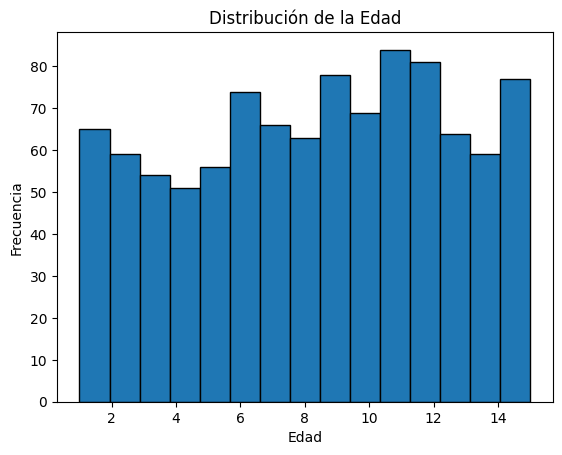

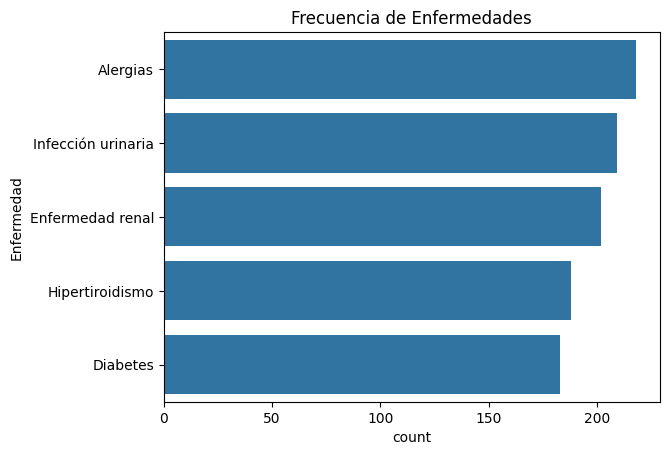

In [5]:
# Histograma para la edad
plt.hist(df['Edad'], bins=15, edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad')
plt.show()

# Gráfico de barras para enfermedades
sns.countplot(y='Enfermedad', data=df, order = df['Enfermedad'].value_counts().index)
plt.title('Frecuencia de Enfermedades')
plt.show()

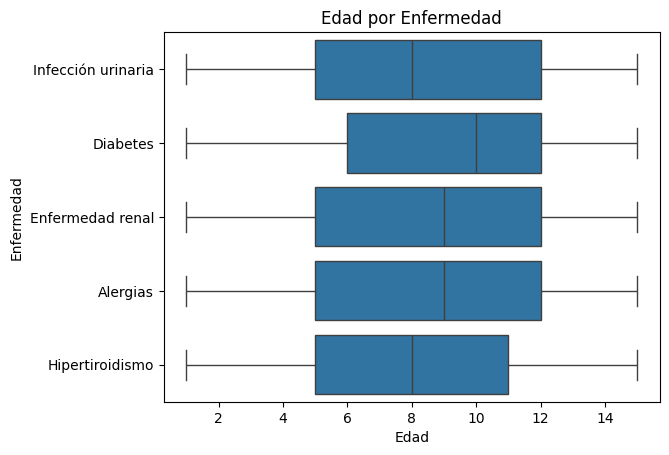

In [6]:
# Boxplot para edad y enfermedad
sns.boxplot(x='Edad', y='Enfermedad', data=df)
plt.title('Edad por Enfermedad')
plt.show()

In [7]:
# Tabla de contingencia
contingency_table = pd.crosstab(df['Enfermedad'], df['Resultado'])

# Test Chi-Cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('p-valor:', p)

p-valor: 0.3871466620147202


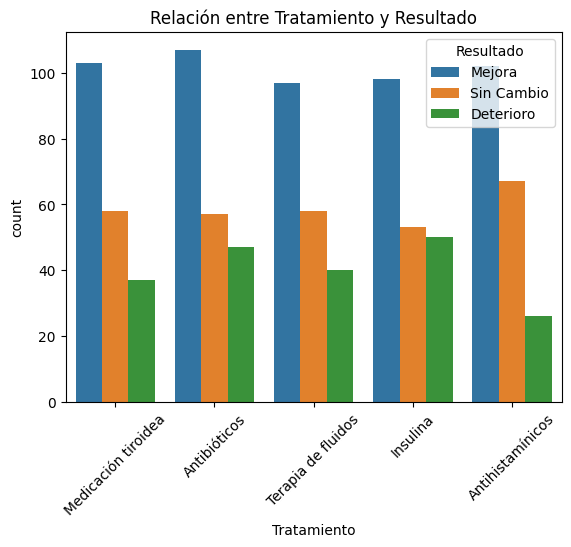

In [8]:
# Relación entre Tratamiento y Resultado
sns.countplot(x='Tratamiento', hue='Resultado', data=df)
plt.xticks(rotation=45)
plt.title('Relación entre Tratamiento y Resultado')
plt.show()

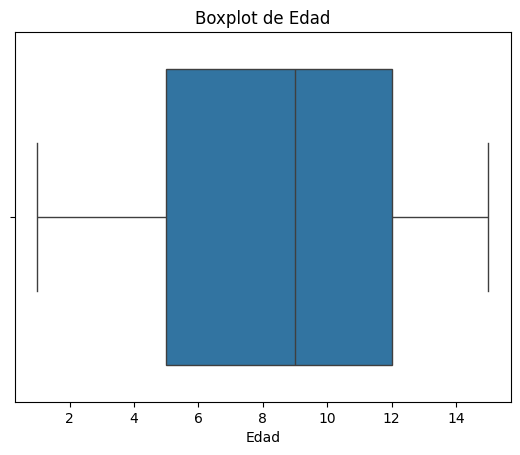

In [9]:
sns.boxplot(x=df['Edad'])
plt.title('Boxplot de Edad')
plt.show()

### Correccion y aumento de datos
En el anterior dataset se pudo evidenciar una carencia de variables para poder completar el y/o realizar un buen entrenamiento de un modelo

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df.drop('Tratamiento', axis=1)  # Características
y = df['Tratamiento']  # Variable objetivo

# One-Hot para variables categóricas
categorical_features = ['Raza', 'Enfermedad']
one_hot = OneHotEncoder()

# Normalización para variables numéricas
numerical_features = ['Edad']
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_features),
        ('cat', one_hot, categorical_features)
    ])

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

800
(800, 5)
(200, 5)
(800,)
(200,)


In [11]:
one_hot

OneHotEncoder()

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Crear el pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

                     precision    recall  f1-score   support

       Antibióticos       0.26      0.18      0.21        45
   Antihistamínicos       0.17      0.21      0.19        38
           Insulina       0.25      0.14      0.18        49
Medicación tiroidea       0.25      0.21      0.23        39
 Terapia de fluidos       0.16      0.34      0.22        29

           accuracy                           0.20       200
          macro avg       0.22      0.22      0.21       200
       weighted avg       0.22      0.20      0.20       200

Accuracy: 0.205


Para el objetivo que se tiene se tuvo que modificar el dataset y/o obtener mas variables por lo cual se tiene ahora un dataset que contiene historial clinico, sintomas, condicion de la salud, estilo de vida

In [13]:
df = pd.read_csv('./diseases_and_treatments_cats2.csv', index_col=0)
df.head()

,ID_Gato,Raza,Edad,Enfermedad,Historial_Clinico,Sintomas,Condicion_Salud,Estilo_Vida,Tratamiento,Resultado
0,1,Siamés,9,Hipertiroidismo,Ninguno,Leve,Ocasional,Exterior,Antibióticos,Deterioro
1,2,British Shorthair,3,Alergias,Ninguno,Leve,Ocasional,Interior,Terapia de fluidos,Mejora
2,3,British Shorthair,13,Hipertiroidismo,Leve,Severo,Crónica,Interior,Antihistamínicos,Deterioro
3,4,Siamés,7,Alergias,Moderado,Severo,Ocasional,Exterior,Antihistamínicos,Sin Cambio
4,5,Siamés,4,Infección urinaria,Severo,Severo,Crónica,Interior,Terapia de fluidos,Mejora


In [14]:
# importacion de otras librerias faltantes
from sklearn.pipeline import Pipeline

In [16]:
# Definir las características y la variable objetivo
X = df.drop('Tratamiento', axis=1)  # Características
y = df['Tratamiento']  # Variable objetivo

# Lista de variables categóricas
categorical_features = ['Raza', 'Enfermedad', 'Historial_Clinico', 'Sintomas', 'Condicion_Salud', 'Estilo_Vida']

# Lista de variables numéricas
numerical_features = ['Edad']

# Crear el transformador para variables categóricas usando one-hot encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crear el transformador para variables numéricas usando la normalización
numerical_transformer = StandardScaler()

# Crear el preprocesador utilizando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Crear un pipeline con el preprocesador
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [17]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(len(X_train))
# print(len(X_test))
# print(len(y_train))
# print(len(y_test))

# Ajustar y transformar los datos de entrenamiento y solo transformar los datos de prueba
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)
print(X_train_transformed.shape)
print(X_test_transformed.shape)

(800, 24)
(200, 24)


In [18]:
# Crear y entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train_transformed, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_transformed)

In [19]:
# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

       Antibióticos       0.14      0.19      0.16        36
   Antihistamínicos       0.23      0.22      0.23        41
           Insulina       0.11      0.11      0.11        37
Medicación tiroidea       0.09      0.07      0.08        40
 Terapia de fluidos       0.24      0.22      0.23        46

           accuracy                           0.17       200
          macro avg       0.16      0.16      0.16       200
       weighted avg       0.17      0.17      0.16       200



In [20]:
from sklearn.metrics import confusion_matrix

# Matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)


[[ 7  7 11  7  4]
 [ 9  9  5  8 10]
 [10  6  4  8  9]
 [13  8  8  3  8]
 [10  9  9  8 10]]


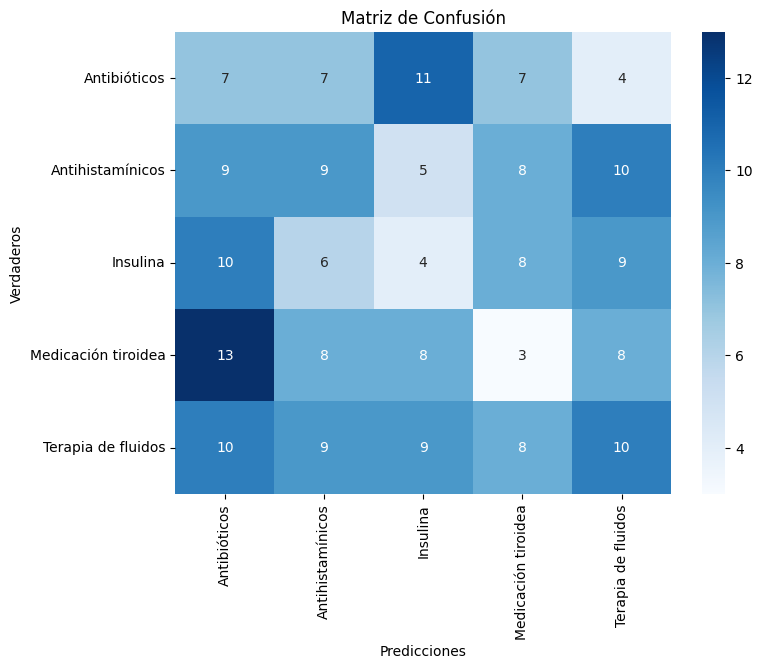

In [23]:
# Etiquetas para los ejes (asumiendo que conoces el orden de las clases)
etiquetas = ['Antibióticos', 'Antihistamínicos', 'Insulina', 'Medicación tiroidea', 'Terapia de fluidos']

# Crear el gráfico de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=etiquetas, yticklabels=etiquetas)

# Títulos y etiquetas
plt.title('Matriz de Confusión')
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')

# Mostrar el gráfico
plt.show()

Dados los resultados puedo decir lastimosamente que el modelo no esta prediciendo bien
Bajas Puntuaciones en General:

Precisión: Valores bajos en todas las clases (rondando entre 0.09 y 0.24), lo que indica que el modelo no es muy preciso en sus predicciones.
Recall: También son bajos, lo que sugiere que el modelo no es bueno identificando correctamente los casos positivos de cada clase.
F1-Score: Igualmente bajos, lo que refleja un equilibrio pobre entre precisión y recall.
Exactitud (Accuracy):

Con una exactitud del 17%, el modelo está actuando muy por debajo de un nivel aceptable, ya que esto indica que solo el 17% de las predicciones son correctas.

Evaluación de la Matriz de Confusión:
La matriz de confusión muestra una gran cantidad de falsos positivos y falsos negativos para cada clase:

Los valores en la diagonal (que representan las clasificaciones correctas) son bajos en comparación con los otros valores en sus respectivas filas y columnas.
Esto sugiere que el modelo se confunde frecuentemente entre las diferentes clases.
Calificación del Modelo:
Dadas estas observaciones, calificaría este modelo como insuficiente para el propósito de predecir tratamientos efectivos. Su baja precisión, recall y F1-score en todas las clases indican que el modelo tiene dificultades para diferenciar entre los diferentes tratamientos y para realizar predicciones fiables.